In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
x, y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
print (f"First five samples of x: {x[:5]}")
print (f"First five samples of y: {y[:5]}")

First five samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y: [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"Feature 1":x[:,0],
                        "Feature 2":x[:,1],
                        "Target":y})
circles.head(5)

,Feature 1,Feature 2,Target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


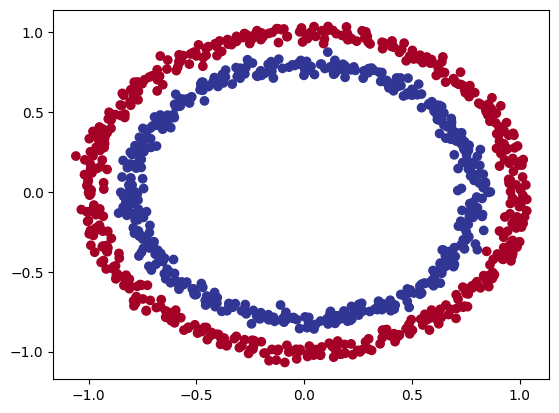

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
x_sample = x[0]
y_sample = y[0]
print(f"values for one sample of x: {x_sample} and the same for y: {y_sample}")
print(f"shapes for one sample of x: {x_sample.shape} and the same for y :{y_sample.shape}")

values for one sample of x: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of x: (2,) and the same for y :()


In [ ]:
import torch
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"x type: {x.type()}")
print(f"y type: {y.type()}")

x type: torch.FloatTensor
y type: torch.FloatTensor


In [ ]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
import torch
from torch import nn
from sklearn import datasets

# Make sure to define the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        # Optionally, use a sequential model (not used in forward)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return self.layer_2(self.layer_1(x))
        # OR, if you want to use the sequential version:
        # return self.two_linear_layers(x)

# Instantiate and send to device
model_0 = CircleModelV0().to(device)

# View the model
print(model_0)


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [ ]:
next (model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=128),
    nn.Linear(in_features=128,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826],
                      [ 0.2180, -0.2435],
                      [ 0.2167, -0.1473],
                      [ 0.5865, -0.4191],
                      [-0.4217, -0.4217],
                      [ 0.6360,  0.2356],
                      [ 0.6804, -0.5836],
                      [-0.7014, -0.5532],
                      [-0.4757,  0.2864],
                      [ 0.2532,  0.5876],
                      [-0.3652, -0.4820],
                      [ 0.3752, -0.2858],
                      [ 0.4292, -0.1678],
                      [ 0.4045, -0.5494],
        

In [ ]:
untrained_preds = model_0(x_test.to(device))
print (f"length of predictions : {len(untrained_preds)}, shape: {untrained_preds.shape}")
print (f"lenght of test sample : {len(x_test)},shape: {x_test.shape}")
print (f"\first 10 predictions:\n{torch.round(untrained_preds[:10])}")
print (f"\nfirst 10 labels: n{y_test[:10]}")

length of predictions : 200, shape: torch.Size([200, 1])
lenght of test sample : 200,shape: torch.Size([200, 2])
irst 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.]], grad_fn=<RoundBackward0>)

first 10 labels: ntensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
y_test [:10], x_test [:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.3387],
        [-0.4199],
        [-0.2251],
        [-0.3705],
        [-0.3822]])

In [ ]:
y_test [:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4161],
        [0.3966],
        [0.4440],
        [0.4084],
        [0.4056]])

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
y_preds = torch.round(y_pred_probs)
y_pred_labes = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labes.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Initialize loss_fn and optimizer outside the loop
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc : {acc:2f}% | test_loss: {test_loss:.5f}, test_acc: {test_acc:2f}%")

Epoch: 0 | loss: 0.71137, Acc : 50.000000% | test_loss: 0.69543, test_acc: 50.000000%
Epoch: 10 | loss: 0.69300, Acc : 50.625000% | test_loss: 0.69441, test_acc: 47.000000%
Epoch: 20 | loss: 0.69298, Acc : 51.375000% | test_loss: 0.69466, test_acc: 44.500000%
Epoch: 30 | loss: 0.69298, Acc : 51.125000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 40 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 50 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 60 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 70 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 80 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 90 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 100 | loss: 0.69298, Acc : 51.000000% | test_loss: 0.69468, test_acc: 46.000000%
Epoch: 110 | loss: 0.69298, Acc : 51.000000

In [ ]:
from urllib import request
import requests
from pathlib import Path

if  Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ( "helper_functions.py", "w") as f:
    f.write(request.text)

from helper_functions import plot_predictions

helper_functions.py already exists


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_decision_boundary(model, X, y):
    # Move data to CPU if it's on GPU
    X = X.to("cpu")
    y = y.to("cpu")

    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Prepare the grid input for the model
    grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    model.eval()
    with torch.inference_mode():
        preds = torch.sigmoid(model(grid.to(next(model.parameters()).device)))

    preds = preds.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, preds.cpu(), cmap="RdYlBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", edgecolor="k")


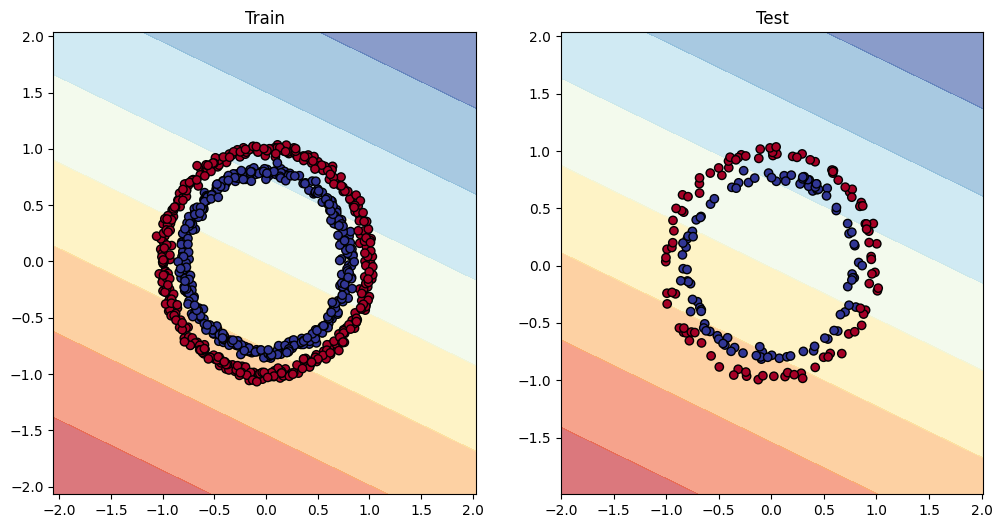

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_0,x_test,y_test)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2974,  0.6313],
                      [ 0.4080, -0.3094],
                      [ 0.4079,  0.1264],
                      [ 0.3593, -0.4309],
                      [-0.6996, -0.2731],
                      [-0.5425,  0.5802],
                      [ 0.2033,  0.2928],
                      [ 0.2242, -0.0121],
                      [ 0.5527, -0.5027],
                      [ 0.0451, -0.4824],
                      [ 0.2177, -0.2436],
                      [ 0.2167, -0.1473],
                      [ 0.5864, -0.4191],
                      [-0.4216, -0.4217],
                      [ 0.6357,  0.2355],
                      [ 0.6811, -0.5833],
                      [-0.7014, -0.5532],
                      [-0.4750,  0.2866],
                      [ 0.2540,  0.5879],
                      [-0.3655, -0.4822],
                      [ 0.3746, -0.2860],
                      [ 0.4298, -0.1675],
                      [ 0.4051, -0.5492],
        

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)

        def forward(self,x):
            return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
import torch
from torch import nn

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))
        # Optionally add non-linearity:
        # x = torch.relu(self.layer_1(x))
        # return self.layer_2(x)


In [ ]:
model_1 = CircleModelV1().to(device)


In [ ]:
import torch

# Set seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Send data to GPU if available
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Loss and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)  # example optimizer

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

# Training loop
epochs = 1000
for epoch in range(epochs):
    model_1.train()

    # Forward pass
    y_logits = model_1(x_train).squeeze()
    loss = loss_fn(y_logits, y_train)

    # Prediction for accuracy
    y_pred = torch.round(torch.sigmoid(y_logits))
    acc = accuracy_fn(y_train, y_pred)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_test, test_pred)

    # Logging
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70654, Acc: 50.00% | Test Loss: 0.70898, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69299, Acc: 50.88% | Test Loss: 0.69472, Test Acc: 46.50%
Epoch: 200 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69465, Test Acc: 45.50%
Epoch: 300 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69466, Test Acc: 45.50%
Epoch: 400 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 45.50%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


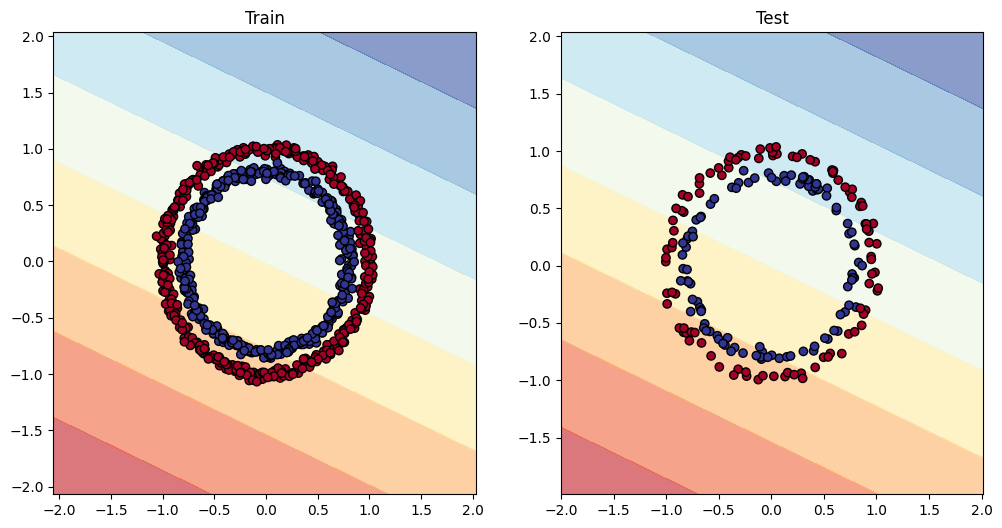

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_1,x_test,y_test)

In [ ]:
 weight = 0.7
 bias = 0.3
 start = 0
 end = 1
 step = 0.02
x_regress = torch.arange(start,end,step).unsqueeze(dim=1)
y_regress = weight * x_regress + bias

print(len(x_regress))
x_regress[:5],y_regress[:5]

50


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
train_split = int(0.8 * len(x_regress))
x_train,y_train = x_regress[:train_split],y_regress[:train_split]
x_test,y_test = x_regress[train_split:],y_regress[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

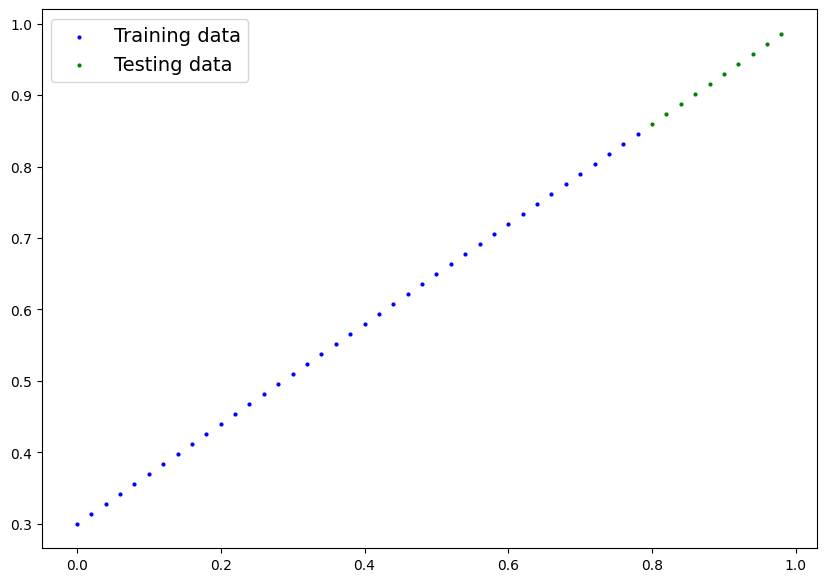

In [ ]:
plot_predictions(train_data=(x_train),
                 train_labels=y_train,
                 test_data=(x_test),
                 test_labels=(y_test),
                 predictions=None)

In [ ]:
 x_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(x_train).squeeze()
    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()

    with torch.inference_mode():
        test_pred = model_2(x_test)
        test_loss = loss_fn(test_pred,y_test)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.75792 | Test Loss: 0.90928
Epoch: 100 | Loss: 0.15092 | Test Loss: 0.18940
Epoch: 200 | Loss: 0.14374 | Test Loss: 0.25534
Epoch: 300 | Loss: 0.14132 | Test Loss: 0.29336
Epoch: 400 | Loss: 0.14046 | Test Loss: 0.31612
Epoch: 500 | Loss: 0.14015 | Test Loss: 0.32970
Epoch: 600 | Loss: 0.14002 | Test Loss: 0.33796
Epoch: 700 | Loss: 0.14000 | Test Loss: 0.34100
Epoch: 800 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 900 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1000 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1100 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1200 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1300 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1400 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1500 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1600 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1700 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1800 | Loss: 0.14000 | Test Loss: 0.34103
Epoch: 1900 | Loss: 0.14000 | Test Loss: 0.34103


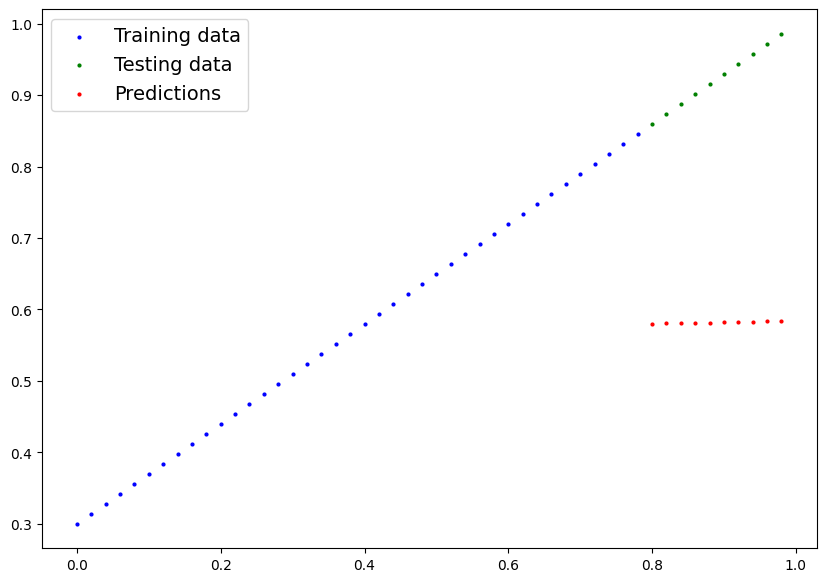

In [ ]:
plot_predictions(
    train_data=x_train.cpu(),
    train_labels=y_train.cpu(),
    test_data=x_test.cpu(),
    test_labels=y_test.cpu(),
    predictions=test_pred.cpu()
)


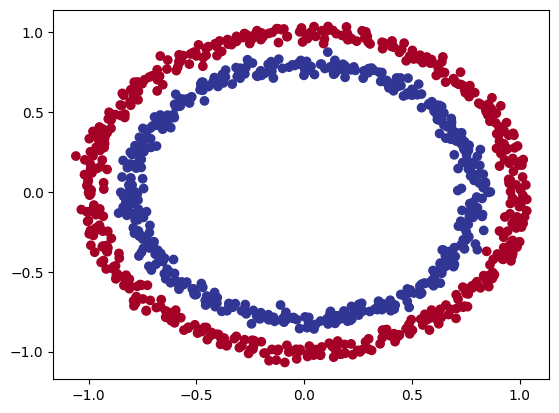

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
x,y = make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()


    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(x_test).squeeze() # Squeeze test_logits here
        test_pred = torch.round(torch.relu(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred) # Corrected y_true argument

        if epoch % 100 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102, Test Acc: 50.00%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940, Test Acc: 50.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723, Test Acc: 50.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411, Test Acc: 50.00%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941, Test Acc: 50.00%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285, Test Acc: 50.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322, Test Acc: 50.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757, Test Acc: 50.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145, Test Acc: 52.50%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test Loss: 0.57378, Test Acc: 56.00%
Epoch: 1100 | Loss: 0.48153, Acc: 93.50% | Test Loss: 0.49935, Test Acc: 70.00%
Epoch: 1200 | Loss: 0.37056, Acc: 97.75% | Test Loss

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Helper functions
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# 1. Create dataset
n_samples = 2000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 2. Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# 4. Model definition
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_2(torch.relu(self.layer_1(x)))

# 5. Instantiate model, loss, optimizer
model_3 = CircleModelV1().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.01)

# 6. Send data to device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# 7. Train loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Eval
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69697, Acc: 53.25% | Test Loss: 0.69702, Test Acc: 52.00%
Epoch: 100 | Loss: 0.55675, Acc: 85.50% | Test Loss: 0.56231, Test Acc: 84.50%
Epoch: 200 | Loss: 0.29844, Acc: 97.75% | Test Loss: 0.30483, Test Acc: 98.00%
Epoch: 300 | Loss: 0.15143, Acc: 99.69% | Test Loss: 0.15714, Test Acc: 99.50%
Epoch: 400 | Loss: 0.09036, Acc: 99.81% | Test Loss: 0.09456, Test Acc: 99.00%
Epoch: 500 | Loss: 0.06139, Acc: 99.81% | Test Loss: 0.06627, Test Acc: 99.00%
Epoch: 600 | Loss: 0.04562, Acc: 99.81% | Test Loss: 0.05087, Test Acc: 99.00%
Epoch: 700 | Loss: 0.03586, Acc: 99.81% | Test Loss: 0.04158, Test Acc: 99.00%
Epoch: 800 | Loss: 0.02937, Acc: 99.81% | Test Loss: 0.03534, Test Acc: 99.00%
Epoch: 900 | Loss: 0.02481, Acc: 99.81% | Test Loss: 0.03100, Test Acc: 99.00%


In [ ]:
# 8. Plot decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Move data to CPU if it's on GPU
    X = X.to("cpu")
    y = y.to("cpu")

    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Generate a mesh grid
    xx, yy = torch.meshgrid(
        torch.linspace(x_min, x_max, 100),
        torch.linspace(y_min, y_max, 100),
        indexing="xy"
    )

    # Prepare the grid input for the model
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1).to(next(model.parameters()).device)

    model.eval()
    with torch.inference_mode():
        # Get the raw model output (logits)
        y_logits = model(grid)

        # Apply softmax to get class probabilities and then argmax to get predicted class indices
        y_pred_probs = torch.softmax(y_logits, dim=1)
        preds = torch.argmax(y_pred_probs, dim=1)


    preds = preds.reshape(xx.shape).cpu()

    # Plot the contour and training examples
    plt.contourf(xx.cpu(), yy.cpu(), preds, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="k")

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
    y_preds[:10], y_test[:10]


In [ ]:
a = torch.arange(-10,10,1,dtype=torch.float32)
a.dtype

torch.float32

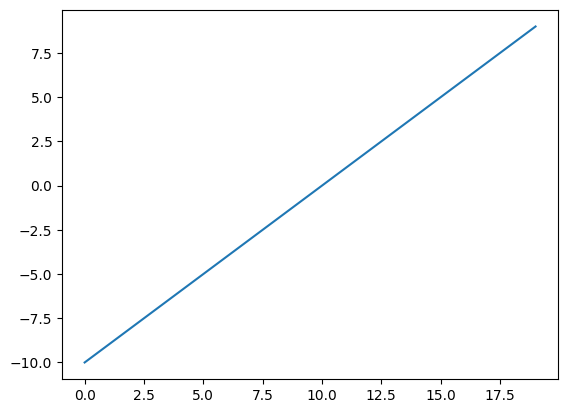

In [ ]:
plt.plot(a);

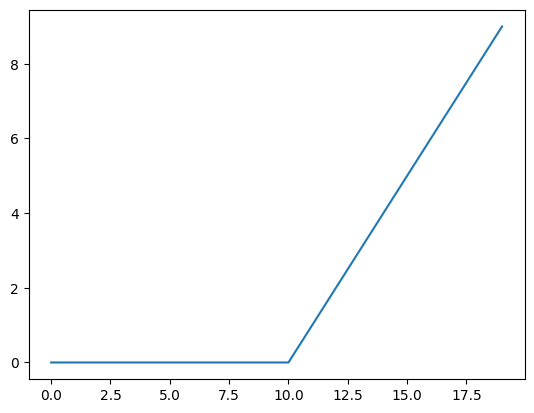

In [ ]:
plt.plot(torch.relu(a));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
   return torch.maximum(torch.tensor(0),x)

relu(a)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

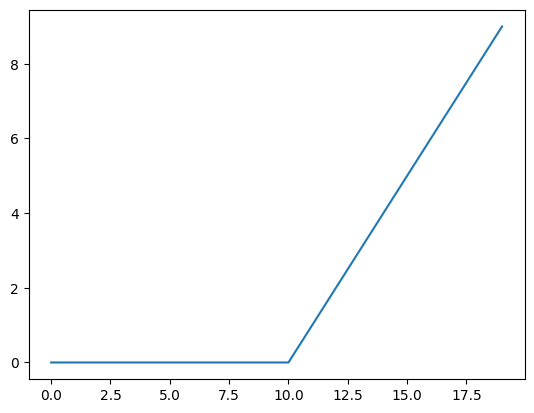

In [ ]:
plt.plot(relu(a));

In [ ]:
def sigmoid (x):
  return 1 / (1+ torch.exp(-a))

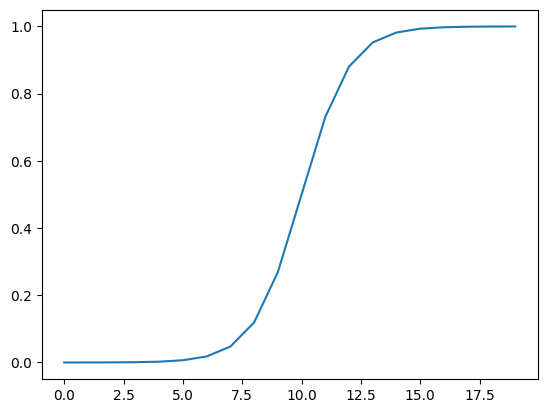

In [ ]:
plt.plot(sigmoid(a));

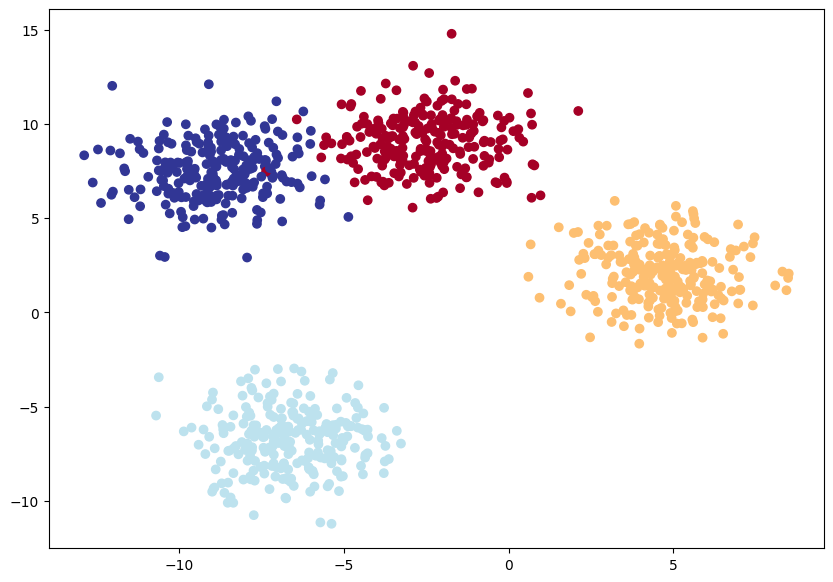

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs # Import make_blobs
import numpy as np

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [ ]:
class blobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    """Connects to the next available port.

    Args:
      minimum: A port value greater or equal to 1024.

    Returns:
      The new minimum port.

    Raises:
      ConnectionError: If no available port is found.
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(               # ✅ Fixed: Sequential must be capitalized and used properly
      nn.Linear(in_features=input_features, out_features=hidden_units),   # ✅ Fixed: Linear and out_features
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)
model_4= blobModel(input_features=2,output_features=4,hidden_units=8).to(device)
model_4


blobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
x_train.shape,y_train.shape[:5]

(torch.Size([1600, 2]), torch.Size([1600]))

In [ ]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [ ]:
model_4.eval()
with torch.inference_mode():
 y_logits = model_4(x_blob_test)
y_logits [:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3715)

In [ ]:
y_preds= torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device).long()
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device).long()

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(x_blob_train)  # Removed squeeze() here
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:  # ✅ This print must be inside the training loop
    model_4.eval()
    with torch.inference_mode():
      test_logits = model_4(x_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
  y_pred[:10]

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3])

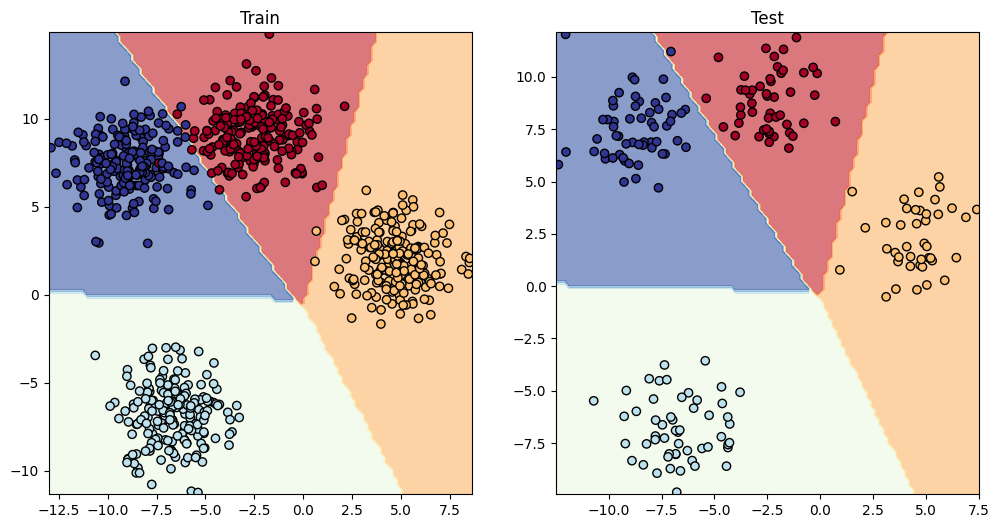

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,x_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,x_blob_test,y_blob_test)


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.6800)